In [2]:
import pandas as pd

In [3]:
exp = pd.read_csv('deseq/deseq2_NGF15_vs_NGF0.txt',sep='\t')

In [4]:
mtyl = pd.read_csv('radar/N-EGF15vs0-result-sig.txt',sep='\t')

In [5]:
m6Agenes = pd.read_csv('~/GitHub/imRIP/m6A-genes.tsv',sep='\t')

> I will be sending the eye samples early next week. Last year we did a nuclear m6A-seq upon EGF. I followed your advice and analyzed it with Radar. I found that most of the genes that changed increased their methylation level upon EGF (being statistically rigurous, 614 transcripts increased their methylation and only 60 decreased it). I also noticed that EGF decreased the presence of m6A sites in introns and increased it in CDS.

> We would like to ask if you or your lab could also analyze the data (link below) and check if you also see an activation of METTL3 upon EGF and a change in the m6A peaks location.

In [6]:
[(t, n) for t,n in zip(m6Agenes.Type, m6Agenes.Names)]

[('m6A writer', 'METTL3'),
 ('m6A writer', 'METTL14'),
 ('m6A writer', 'WTAP'),
 ('m6A writer', 'KIAA1429'),
 ('m6A writer', 'RBM15 and its paralogue RBM15B'),
 ('m6A writer', 'METTL16'),
 ('m6A eraser', 'FTO'),
 ('m6A eraser', 'ALKBH5'),
 ('m6A reader', 'YTHDC1'),
 ('m6A reader', 'YTHDF1'),
 ('m6A reader', 'YTHDF2'),
 ('m6A reader', 'YTHDF3'),
 ('m6A reader', 'HNRNPA2B1'),
 ('m6A reader', 'EIF3'),
 ('m6A reader', 'HNRNPC')]

In [7]:
exp.loc[[x in m6Agenes.Names.tolist() for x in exp.name.tolist()],]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,ensembl
ENSG00000083896.12,1444.130059,0.464797,0.850701,0.546370,0.584812,0.999772,YTHDC1,ENSG00000083896
ENSG00000091542.9,892.968565,-0.118084,0.596193,-0.198064,0.842995,0.999772,ALKBH5,ENSG00000091542
ENSG00000092199.17,5963.010417,0.169214,0.895043,0.189056,0.850049,0.999772,HNRNPC,ENSG00000092199
ENSG00000122566.21,6418.799518,0.229054,1.096430,0.208909,0.834520,0.999772,HNRNPA2B1,ENSG00000122566
ENSG00000127804.13,1814.552611,-0.129645,0.359416,-0.360710,0.718316,0.999772,METTL16,ENSG00000127804
ENSG00000140718.21,4838.012497,0.266628,0.428732,0.621899,0.534008,0.999772,FTO,ENSG00000140718
ENSG00000145388.15,650.997654,0.471322,0.686641,0.686417,0.492450,0.999772,METTL14,ENSG00000145388
ENSG00000149658.18,2041.264731,-0.078882,0.708161,-0.111390,0.911307,0.999772,YTHDF1,ENSG00000149658
ENSG00000165819.12,1041.599141,0.162026,0.851981,0.190176,0.849171,0.999772,METTL3,ENSG00000165819
ENSG00000185728.17,1509.696983,0.637302,0.737578,0.864046,0.387562,0.999772,YTHDF3,ENSG00000185728


In [8]:
mtyl.loc[[x in m6Agenes.Names.tolist() for x in mtyl.name.tolist()],]

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
176,chr4,68337308,68337357,YTHDC1,0,-,68337308,68337357,0,1,49,0,-0.537143,0.000855,ENSG00000083896.12
465,chr7,26196590,26196639,HNRNPA2B1,0,-,26196590,26196639,0,1,49,0,-0.824521,0.001914,ENSG00000122566.21
1277,chr8,63186337,63186386,YTHDF3,0,+,63186337,63186386,0,1,49,0,-0.952367,0.000267,ENSG00000185728.17
1278,chr8,63186486,63186535,YTHDF3,0,+,63186486,63186535,0,1,49,0,-1.020000,0.000235,ENSG00000185728.17
1279,chr8,63186635,63186734,YTHDF3,0,+,63186635,63186734,0,1,99,0,-0.724665,0.000003,ENSG00000185728.17
1280,chr8,63187679,63187728,YTHDF3,0,+,63187679,63187728,0,1,49,0,-0.755668,0.000472,ENSG00000185728.17


In [35]:
exp_up = set(exp[(exp.pvalue < 0.01) & (exp.log2FoldChange >= 0.5)].name.tolist())

exp_na = set(exp[(exp.pvalue > 0.01) & (exp.log2FoldChange.abs() < 0.5)].name.tolist())

exp_dn = set(exp[(exp.pvalue < 0.01) & (exp.log2FoldChange <= -0.5)].name.tolist())

In [36]:
mtyl_up = set(mtyl[(mtyl.p_value < 0.001) & (mtyl.logFC >= 1)].name.tolist())

mtyl_na = set(mtyl[(mtyl.p_value > 0.001) & (mtyl.logFC.abs() < 1)].name.tolist())

mtyl_dn = set(mtyl[(mtyl.p_value < 0.001) & (mtyl.logFC <= -1)].name.tolist())

In [44]:
from matplotlib import pyplot as plt
from upsetplot import from_contents, UpSet, plot

data = from_contents({
    'exp_up':exp_up,
    'exp_dn':exp_dn,
    'exp_na':exp_na,
    'mtyl_up':mtyl_up,
    'mtyl_dn':mtyl_dn,
    'mtyl_na':mtyl_na
})

upset = UpSet(data, show_counts=True)

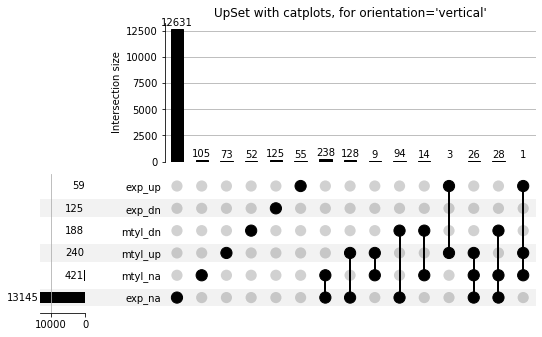

In [40]:
p = upset.plot()

plt.title("UpSet with catplots, for orientation='vertical'")
# plt.savefig('upset_exp_mtyl.pdf')
plt.show()


## Question 1

> 1. Transcripts that go up at 15’ but they do not get m6A methylated

In [46]:
exp_up & mtyl_na

{'NR4A1'}

In [75]:
exp.loc[exp.name == list(exp_up & mtyl_na)[0]]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,ensembl
ENSG00000123358.20,10350.831405,2.606128,0.620548,4.199723,0.000027,0.04245,NR4A1,ENSG00000123358


In [57]:
mtyl.loc[mtyl.name == list(exp_up & mtyl_na)[0]]

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
473,chr12,52055561,52055660,NR4A1,0,+,52055561,52055660,0,1,99,0,2.197225,0.000014,ENSG00000123358.20
474,chr12,52055911,52055960,NR4A1,0,+,52055911,52055960,0,1,49,0,0.778803,0.002200,ENSG00000123358.20
475,chr12,52056310,52056359,NR4A1,0,+,52056310,52056359,0,1,49,0,1.770706,0.001379,ENSG00000123358.20
476,chr12,52056660,52056709,NR4A1,0,+,52056660,52056709,0,1,49,0,1.475907,0.000527,ENSG00000123358.20


## Question 2

> 2. Transcripts that go up at 15’ and they get proportionally increased m6A methylation


In [48]:
exp_up & mtyl_up

{'EGR3', 'JUN', 'NR4A1', 'ZNF408'}

In [76]:
exp.loc[exp['name'].isin(list(exp_up & mtyl_up))]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,ensembl
ENSG00000123358.20,10350.831405,2.606128,0.620548,4.199723,2.672420e-05,0.042450,NR4A1,ENSG00000123358
ENSG00000175213.3,722.538134,1.825572,0.571049,3.196875,1.389251e-03,0.572592,ZNF408,ENSG00000175213
ENSG00000177606.7,1059.112825,2.434471,0.821298,2.964175,3.034956e-03,0.727811,JUN,ENSG00000177606
ENSG00000179388.9,244.609072,5.062132,0.979254,5.169373,2.348803e-07,0.001025,EGR3,ENSG00000179388


In [74]:
mtyl.loc[mtyl['name'].isin(list(exp_up & mtyl_up))]

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
473,chr12,52055561,52055660,NR4A1,0,+,52055561,52055660,0,1,99,0,2.197225,1.446715e-05,ENSG00000123358.20
474,chr12,52055911,52055960,NR4A1,0,+,52055911,52055960,0,1,49,0,0.778803,2.200472e-03,ENSG00000123358.20
475,chr12,52056310,52056359,NR4A1,0,+,52056310,52056359,0,1,49,0,1.770706,1.379011e-03,ENSG00000123358.20
476,chr12,52056660,52056709,NR4A1,0,+,52056660,52056709,0,1,49,0,1.475907,5.265661e-04,ENSG00000123358.20
1156,chr11,46704480,46704529,ZNF408,0,+,46704480,46704529,0,1,49,0,2.128232,4.461848e-04,ENSG00000175213.3
1157,chr11,46704579,46704628,ZNF408,0,+,46704579,46704628,0,1,49,0,0.991192,9.966457e-04,ENSG00000175213.3
1181,chr1,58782074,58782123,JUN,0,-,58782074,58782123,0,1,49,0,1.271440,1.585832e-03,ENSG00000177606.7
1182,chr1,58782715,58782764,JUN,0,-,58782715,58782764,0,1,49,0,1.109662,5.418630e-04,ENSG00000177606.7
1183,chr1,58782863,58783011,JUN,0,-,58782863,58783011,0,1,148,0,1.275752,8.961117e-08,ENSG00000177606.7
1184,chr1,58783406,58783455,JUN,0,-,58783406,58783455,0,1,49,0,1.386294,1.014096e-03,ENSG00000177606.7


## Question 3
> 3. Transcripts that go up at 15’ and their m6 methylation goes higher than their level of induction.

In [ ]:
# exp_up & mtyl_up

## Question 4

In [60]:
# > 4. Transcripts that do not change at 15’ but their methylation level increase
exp_na & mtyl_up

{'ABHD17A',
 'AC003102.1',
 'AC008875.3',
 'AC074143.1',
 'AC126755.1',
 'AC138969.1',
 'ADAP2',
 'ADPRHL1',
 'AJM1',
 'AL031681.3',
 'AL391422.4',
 'ANAPC11',
 'ANKLE1',
 'ANKRD9',
 'AOC2',
 'AP000944.5',
 'ARFRP1',
 'ARHGEF18',
 'ARHGEF2',
 'ATF6B',
 'AURKAIP1',
 'B3GAT3',
 'BAHD1',
 'BAP1',
 'BRF1',
 'CACTIN',
 'CC2D1A',
 'CCDC12',
 'CCDC130',
 'CCDC85B',
 'CCM2',
 'CD37',
 'CDC34',
 'CELSR3',
 'CEP250',
 'CES2',
 'CHKB-CPT1B',
 'CIC',
 'CLK3',
 'CNPY3',
 'COPG1',
 'CSAD',
 'CSNK1D',
 'DBNL',
 'DDX39A',
 'DDX51',
 'DGAT1',
 'DHX38',
 'DNAJC14',
 'DNAJC5',
 'DNHD1',
 'ECE1',
 'ECSIT',
 'EEF1A2',
 'EHD1',
 'EIF3G',
 'EME2',
 'EML3',
 'EPHB4',
 'EPOR',
 'EPPK1',
 'FCHSD1',
 'FLAD1',
 'FOSL2',
 'FOXK1',
 'FOXO3',
 'FPGS',
 'GATA2',
 'GIGYF1',
 'GIPC1',
 'GLIS2',
 'GPR162',
 'GTF2F1',
 'GTF3C5',
 'HCG18',
 'IL11',
 'ING5',
 'ITPKC',
 'KLC1',
 'LINC00963',
 'LPAR2',
 'LRP6',
 'LRRC14',
 'MAP3K11',
 'MCF2L',
 'MDC1',
 'MNT',
 'MRPL21',
 'MTHFR',
 'MUS81',
 'MYO1C',
 'NBPF1',
 'NFIC',
 'NOL

In [77]:
exp.loc[exp['name'].isin(list(exp_na & mtyl_up))]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,ensembl
ENSG00000008300.17,2529.795942,0.078045,0.716866,0.108869,0.913306,0.999772,CELSR3,ENSG00000008300
ENSG00000011422.12,1057.572937,0.208855,0.607887,0.343575,0.731166,0.999772,PLAUR,ENSG00000011422
ENSG00000015676.18,3552.243672,0.131317,0.515434,0.254770,0.798901,0.999772,NUDCD3,ENSG00000015676
ENSG00000026036.22,60.096478,0.120083,0.620597,0.193496,0.846571,0.999772,RTEL1-TNFRSF6B,ENSG00000026036
ENSG00000040487.13,617.457953,-0.205865,0.522538,-0.393971,0.693602,0.999772,SLC66A1,ENSG00000040487
...,...,...,...,...,...,...,...,...
ENSG00000266028.7,3346.145365,0.136833,0.564776,0.242278,0.808565,0.999772,SRGAP2,ENSG00000266028
ENSG00000270504.1,217.432437,-0.117272,0.804142,-0.145835,0.884051,0.999772,AL391422.4,ENSG00000270504
ENSG00000285816.1,203.555542,0.216331,0.471039,0.459264,0.646045,0.999772,AP000944.5,ENSG00000285816
ENSG00000287263.1,318.497084,0.407719,0.343264,1.187771,0.234923,0.999772,AC008875.3,ENSG00000287263


In [78]:
mtyl.loc[mtyl['name'].isin(list(exp_na & mtyl_up))]

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
6,chr3,48659687,48659736,CELSR3,0,-,48659687,48659736,0,1,49,0,1.074515,5.295161e-04,ENSG00000008300.17
14,chr19,43667961,43668010,PLAUR,0,-,43667961,43668010,0,1,49,0,1.742969,8.650925e-04,ENSG00000011422.12
20,chr7,44382417,44382466,NUDCD3,0,-,44382417,44382466,0,1,49,0,2.621039,9.897049e-04,ENSG00000015676.18
28,chr20,63695417,63695466,RTEL1-TNFRSF6B,0,+,63695417,63695466,0,1,49,0,1.080913,4.132788e-04,ENSG00000026036.22
51,chr1,19328704,19328753,SLC66A1,0,+,19328704,19328753,0,1,49,0,1.536867,3.585774e-04,ENSG00000040487.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,chr1,206456037,206456086,SRGAP2,0,+,206456037,206456086,0,1,49,0,1.471817,9.404941e-05,ENSG00000266028.7
1600,chr6,3752491,3752540,AL391422.4,0,+,3752491,3752540,0,1,49,0,1.155771,6.188685e-04,ENSG00000270504.1
1653,chr11,65321184,65321233,AP000944.5,0,+,65321184,65321233,0,1,49,0,1.252763,5.426027e-04,ENSG00000285816.1
1661,chr5,42992185,42992234,AC008875.3,0,-,42992185,42992234,0,1,49,0,3.891820,3.516072e-07,ENSG00000287263.1
